###  KNN 분류 모델 실습

- 주어진 과제 : iris 붓꽃 데이터를 가지고 종류 분류하기
- 어떻게 분류할 수 있을까? 
> 붓꽃 종류별로 **특징**을 알면 된다~

In [4]:
from IPython.display import Image
Image(url='https://user-images.githubusercontent.com/15958325/56006707-f69f3680-5d10-11e9-8609-25ba5034607e.png')


### 라이브러리 불러오기 

In [2]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns


### 1. 데이터 로드하기

In [3]:
# iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris  # 사이킷런에서 제공하는 데이터
iris = load_iris()

print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
print(type(iris))


<class 'sklearn.utils.Bunch'>


### 2. 데이터 탐색하기 

### 데이터 전처리
- 분류모델은 지도학습으로 **정답**이 반드시 필요함
- 학습을 위한 데이터 준비


#### Feature Data 

In [5]:
print(iris.keys())

# sepal: 꽃받침, petal: 꽃잎
features = iris['data']
print(features[:5])


feature_names = iris['feature_names']
print(feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Label data
- 지도학습은 **정답**이 반드시 필요함!

In [6]:
# 정답데이터 확인하기
# features = iris[‘data’]

labels = iris['target']  # 정답데이터
print(iris['target_names'])
print(labels)


['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 데이터셋을 DataFrame으로 변환
- pandas 사용 

In [7]:
print(type(features))

<class 'numpy.ndarray'>


In [8]:
df = pd.DataFrame(features, columns=feature_names)  
df.head()   # 상위 5개의 데이터값 반환

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = labels  # column 추가(이름은 임의로 지정 가능)
df.tail()  # 하위 5개의 데이터값 반환

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### DataFrame 시각화
- matplotlib : 데이터 시각화 패키
- seaborn : Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

C:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


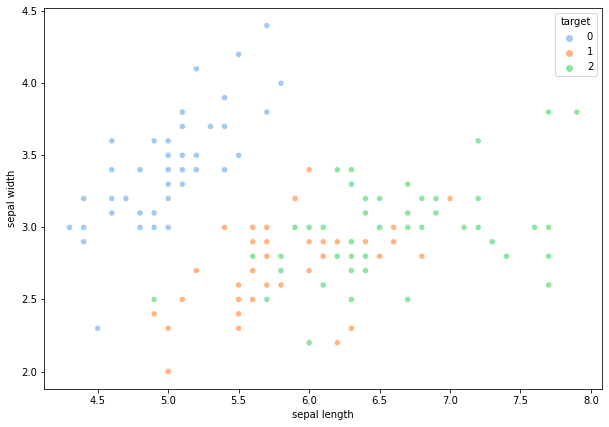

In [10]:
plt.figure(figsize=(10, 7))  # 그래프 사이즈 설정
# iloc 사용하여 sepal length (cm), sepal width (cm) 값만 출력

sns.scatterplot(features[:, 0], features[:, 1], hue=df['target'], palette='pastel')
plt.xlabel("sepal length")  # x축
plt.ylabel("sepal width")  # y축
plt.show()



C:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


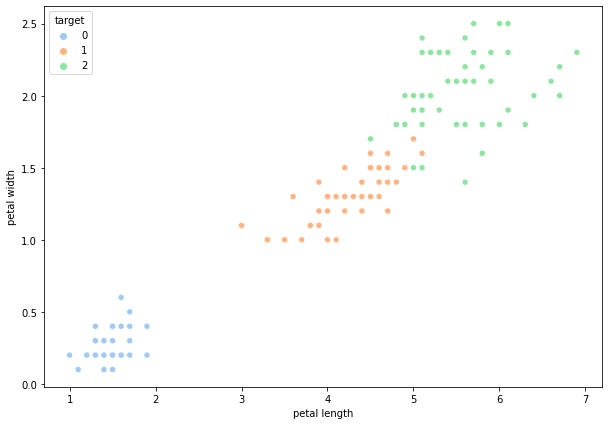

In [11]:
# 그래프 사이즈 설정

plt.figure(figsize=(10, 7))
sns.scatterplot(features[:, 2], features[:, 3], hue=df['target'], palette='pastel')
plt.xlabel("petal length") # x축
plt.ylabel("petal width")  # y축
plt.show()


### 데이터분리
 
- train(학습) / test(검증) 데이터 분리하기
 => 일반화된 모델을 만드는 것이 주목적이므로 학습(train)/검증(test) 데이터 분리가 중요함
- 1. 학습데이터, 검증데이터 각각 특징(x)과 정답(y)으로 나눠지는 데이터를 만들기
- 2. Scikit-learn의 train_test_split 이용하여 Train/Test 데이터 분리하기
- 3. 데이터 분리 방법은 여러가지(7:3 or 8:2) => 클래스별로 분리해야함


In [12]:
from sklearn.model_selection import train_test_split


In [13]:
# iloc 함수 예제
print(df.iloc[:, 0])  # features[:, 0]과 동일


0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


In [14]:
x = df.iloc[:, :4] # 특징데이터 : x
print(x.head())

y = df['target']  # 정답데이터 : y - 지도학습은 '정답데이터'가 반드시 필요함
print(y.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# test_size: 검증 세트에 할당할 비율, 기본값 0.25
# stratify: 분할된 샘플의 class 개수를 동일한 비율로 유지
# random_state: 랜덤 시드값

print(x.shape)     # 총 150개의 데이터 중에
print(x_train.shape)  # 75%인 112개를 학습에 사용
print(x_test.shape)  # 25%인 38개를 검증에 사용


(150, 4)
(112, 4)
(38, 4)


### KNN 분류 모델 생성
- K-최근접 이웃 분류 알고리즘
- 가장 단순하고 쉬운 알고리즘 => 가장 가까운 이웃찾아서 분류
- 거의 사용하지 않는다 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# 5개의 이웃 선택
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 모델학습
knn.fit(x_train, y_train)


KNeighborsClassifier(n_jobs=-1)

In [17]:
# 검증(evaluation)
# test set의 정확도 출력

print(knn.score(x_test, y_test))


0.9736842105263158


In [18]:
y_pred = knn.predict(x_test)
print(x_test.shape)  # 검증데이터의 크기

# 38개의 검증데이터로 분류한 결과
print(y_pred) 


(38, 4)
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [19]:
# 꽃받침 길이가 5.8cm, 폭이 3.7cm, 꽃잎의 길이가 5.1cm, 폭이 1.4cm인 붓꽃은 어떤 품종일지 예측하기
# numpy 배열(샘플 수에 특성 수를 곱한 크기로 만들기)
new_data = np.array([[5.8, 3.7, 5.1, 1.4]])
print(new_data.shape)  # (1,4)

pred = knn.predict(new_data)
print(pred)  # target
print("품종 이름 : ", iris['target_names'][pred])


(1, 4)
[1]
품종 이름 :  ['versicolor']


### 전체 데이터 시각화 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF2CD99490>,
      dtype=object)

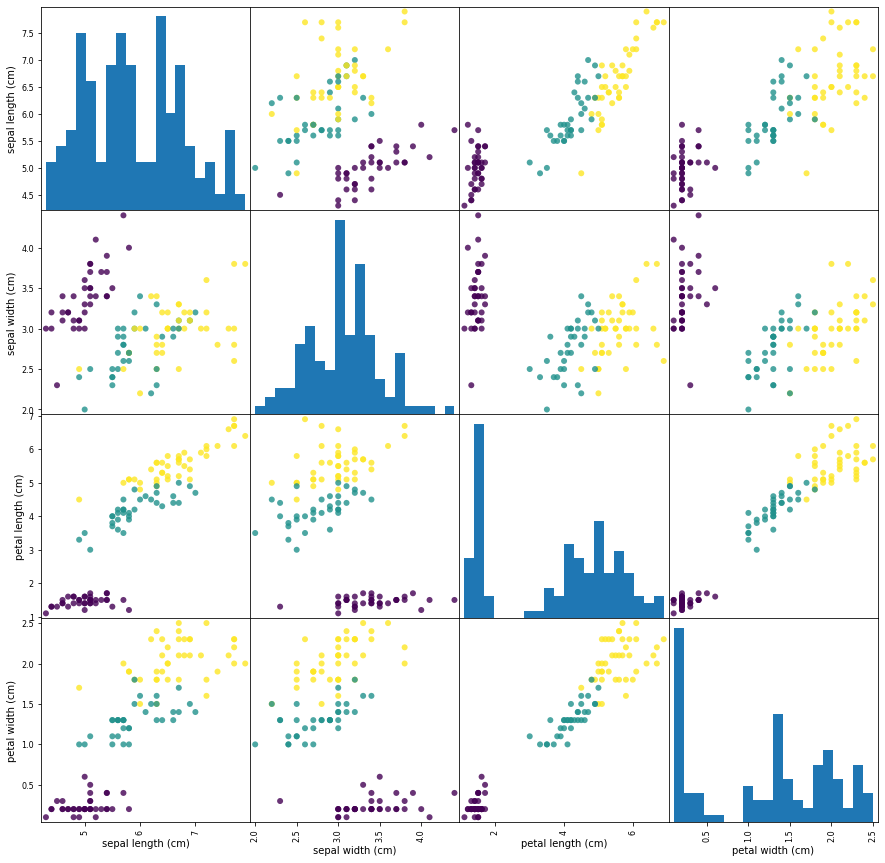

In [20]:
# 학습데이터로 데이터프레임 생성
train_df = pd.DataFrame(x_train, columns=feature_names)

# 판다스에서 제공하는 시각화 도구 사용
pd.plotting.scatter_matrix(train_df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, alpha=.8)


### 데이터 정규화
- 다른 통계 데이터들을 비교하기 용이하기 때문에 데이터 전처리 과정에서 필요함 
- 표준화 => 평균을 0, 분산 (표준편차)를 1로 만들어줌 

In [21]:
# MinMaxScaler의 활용

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled[:5]


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [22]:
x_scaled.min(), x_scaled.max()

(0.0, 1.0)

### 전, 후 비교(시각화)
- x축 범위가 0~1

C:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AI06\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


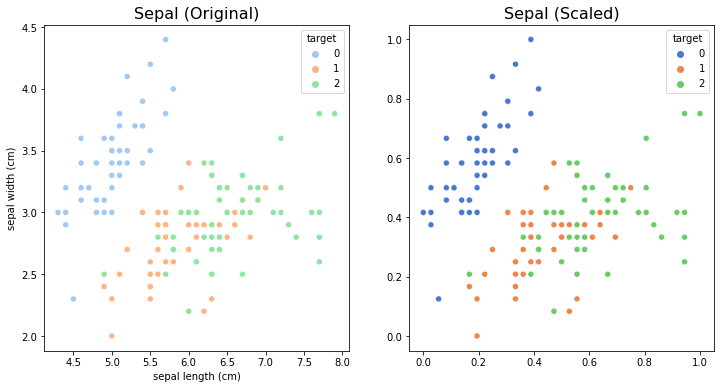

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x.iloc[:, 0], x.iloc[:, 1], hue=df['target'], palette='pastel')
plt.title('Sepal (Original)', fontsize=16)

plt.subplot(1, 2, 2)
sns.scatterplot(x_scaled[:, 0], x_scaled[:, 1], hue=y, palette='muted')
plt.title('Sepal (Scaled)', fontsize=16)
plt.show()


C:\Users\AI06\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AI06\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


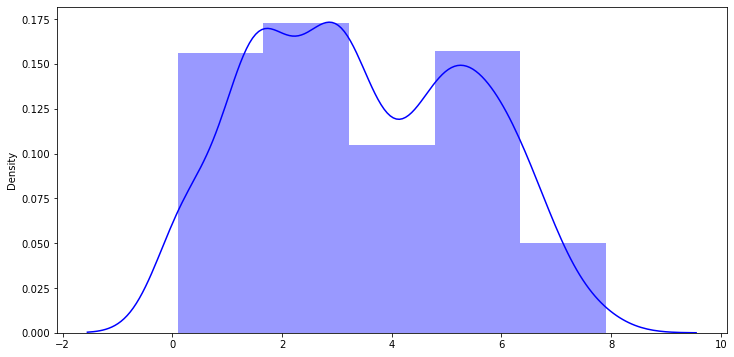

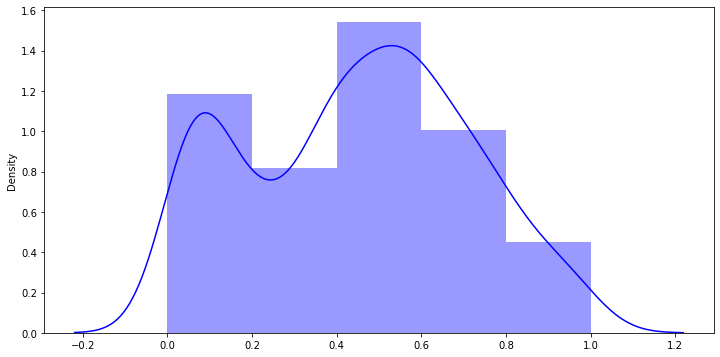

In [32]:
plt.figure(figsize=(12, 6))
sns.distplot(x, bins=5, color='b')

plt.figure(figsize=(12, 6))
sns.distplot(x_scaled, bins=5, color='b')
# 정규화된 데이터이기 때문에 표준화 작업 pass  